In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FCPython
from pprint import pprint
import json

In [23]:
match_id = str(input('Enter the match id: '))
#read in data from my statsbomb file
with open('Statsbomb/data/events/'+match_id+'.json') as f:
    data = json.load(f)

Enter the match id: 7580


In [24]:
#Ability to look at all the data. I use this so I can look at the data while I am doing it. 
#We use pretty print to look at the json file cleanly.
#pprint(data)

In [25]:
minute = []
team = []
player = []
ball_type = []
location = []
xG = []
outcome = []
col_names = ['Minute','Team','Player','Type','Location','xG','Outcome']
for x in range(len(data)):
    if data[x]['type']['name'] == 'Shot':
        minute.append(data[x]['minute'])
        team.append(data[x]['possession_team']['name'])
        player.append(data[x]['player']['name'])
        ball_type.append(data[x]['type']['name'])
        location.append(data[x]['location'])
        xG.append(data[x]['shot']['statsbomb_xg'])
        outcome.append(data[x]['shot']['outcome']['name'])     

'''
Here we create the data frame with pandas. The data we read in will come in reverse in terms of the columns and rows so
we want to transpose it to flip columns and rows.
'''

df = pd.DataFrame(data=[minute,team,player,ball_type,location,xG,outcome],index=col_names)
df = df.T
df.head()

,Minute,Team,Player,Type,Location,xG,Outcome
0,8,France,Antoine Griezmann,Shot,"[95.0, 50.0]",0.0516021,Post
1,12,France,Antoine Griezmann,Shot,"[108.0, 40.0]",0.76,Goal
2,20,France,Paul Pogba,Shot,"[102.0, 33.0]",0.0851873,Off T
3,21,Argentina,Éver Maximiliano David Banega,Shot,"[96.0, 27.0]",0.0176794,Blocked
4,40,Argentina,Ángel Fabián Di María Hernández,Shot,"[90.0, 38.0]",0.0234171,Goal


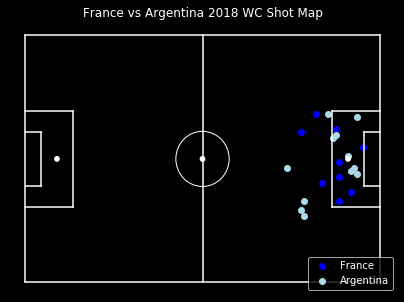

In [105]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,82], color="white")
plt.plot([0,122],[82,82], color="white")
plt.plot([122,122],[82,0], color="white")
plt.plot([122,0],[0,0], color="white")
plt.plot([61,61],[0,82], color="white")

#Left Penalty Area
plt.plot([16.5,16.5],[57,25],color="white")
plt.plot([0,16.5],[57,57],color="white")
plt.plot([16.5,0],[25,25],color="white")

#Right Penalty Area
plt.plot([122,105.5],[57,57],color="white")
plt.plot([105.5,105.5],[57,25],color="white")
plt.plot([105.5,122],[25,25],color="white")

#Left 6-yard Box
plt.plot([0,5.5],[50,50],color="white")
plt.plot([5.5,5.5],[50,32],color="white")
plt.plot([5.5,0.5],[32,32],color="white")

#Right 6-yard Box
plt.plot([122,116.5],[50,50],color="white")
plt.plot([116.5,116.5],[50,32],color="white")
plt.plot([122,116.5],[32,32],color="white")

#Prepare Circles
centreCircle = plt.Circle((61,41),9.15,color="white",fill=False)
centreSpot = plt.Circle((61,41),0.8,color="white")
leftPenSpot = plt.Circle((11,41),0.8,color="white")
rightPenSpot = plt.Circle((111,41),0.8,color="white")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Tidy Axes
plt.axis('off')
plt.style.use('dark_background')
#plt.style.use('grayscale')
#plt.scatter(cx,cy,color='blue',label='Argentina')
#plt.scatter(mx,my,color='red',label='Iceland')

team_a = data[0]['team']['name']
team_b = data[1]['team']['name']
a_label = team_a
b_label = team_b


for x in range(len(df['Location'])):
    if df['Team'][x] == team_a:
        plt.scatter(df['Location'][x][0],df['Location'][x][1],color='blue',label=a_label)
        a_label = "_nolegend_"
    if df['Team'][x] == team_b:
        plt.scatter(df['Location'][x][0],df['Location'][x][1],color='lightblue',label=b_label)
        b_label = "_nolegend_"
        
plt.legend(loc='lower right')
plt.title(team_a + ' vs ' + team_b +' 2018 WC Shot Map')
plt.savefig('fa1.png')
        

In [66]:
a_player = []
b_player = []
a_xG = []
b_xG = []
a_min = []
b_min = []
a_goals = []
b_goals = []
in_names = ['aplayer','axG','amin','aGoal','aCum','bplayer','bxG','bmin','bGoal','bCum']

for x in range(len(df['xG'])):
    if df['Team'][x]==team_a:
        a_player.append(df['Player'][x])
        a_xG.append((df['xG'][x]))
        a_min.append(df['Minute'][x])
        if df['Outcome'][x]=='Goal':
            a_goals.append('Goal')
        else:
            a_goals.append('Miss')

    if df['Team'][x]==team_b:
        b_player.append(df['Player'][x])
        b_xG.append((df['xG'][x]))
        b_min.append(df['Minute'][x])
        if df['Outcome'][x]=='Goal':
            b_goals.append('Goal')
        else:
            b_goals.append('Miss')
        
def nums_cumulative_sum(nums_list):
  return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cum = nums_cumulative_sum(a_xG)
b_cum = nums_cumulative_sum(b_xG)

In [67]:
df2 = pd.DataFrame(data=[a_player,a_xG,a_min,a_goals,a_cum,b_player,b_xG,b_min,b_goals,b_cum],index=in_names)
df2 = df2.T

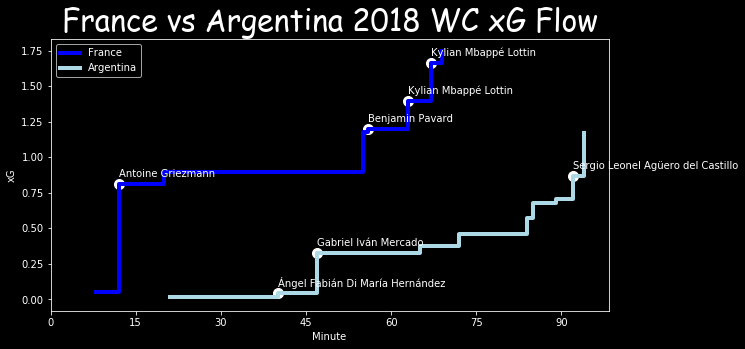

In [101]:
'''
Plot the xG Flow
'''
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
plt.title(team_a + ' vs ' + team_b +' 2018 WC xG Flow',fontsize=30,fontname='Comic Sans MS')


plt.step(a_min,a_cum,color='Blue',label=team_a,linewidth=4,where='post')
plt.step(b_min,b_cum,color='lightblue',label=team_b,linewidth=4,where='post')


for x in range(len(df2['axG'])):
    if df2['aGoal'][x]=='Goal':
        plt.scatter(df2['amin'][x],df2['aCum'][x],s=100,c='white')
        plt.annotate(df2['aplayer'][x],xy=(df2['amin'][x],df2['aCum'][x]+.05))
    if df2['bGoal'][x]=='Goal':
        plt.scatter(df2['bmin'][x],df2['bCum'][x],s=100,c='white')
        plt.annotate(df2['bplayer'][x],xy=(df2['bmin'][x],df2['bCum'][x]+.05))
        

        
        
plt.xticks([0,15,30,45,60,75,90])        
plt.xlabel('Minute')
plt.ylabel('xG')
plt.legend(loc='upper left')

plt.savefig('fa.png')

In [69]:
df2

,aplayer,axG,amin,aGoal,aCum,bplayer,bxG,bmin,bGoal,bCum
0,Antoine Griezmann,0.0516021,8,Miss,0.0516021,Éver Maximiliano David Banega,0.0176794,21,Miss,0.0176794
1,Antoine Griezmann,0.76,12,Goal,0.811602,Ángel Fabián Di María Hernández,0.0234171,40,Goal,0.0410965
2,Paul Pogba,0.0851873,20,Miss,0.896789,Lionel Andrés Messi Cuccittini,0.0180519,47,Miss,0.0591484
3,Antoine Griezmann,0.279568,55,Miss,1.17636,Gabriel Iván Mercado,0.267176,47,Goal,0.326324
4,Benjamin Pavard,0.0204942,56,Goal,1.19685,Lionel Andrés Messi Cuccittini,0.0340654,65,Miss,0.360389
5,Blaise Matuidi,0.0878585,63,Miss,1.28471,Lionel Andrés Messi Cuccittini,0.0127261,65,Miss,0.373115
6,Kylian Mbappé Lottin,0.108894,63,Goal,1.3936,Nicolás Hernán Otamendi,0.0893397,72,Miss,0.462455
7,Kylian Mbappé Lottin,0.26658,67,Goal,1.66018,Lionel Andrés Messi Cuccittini,0.111065,84,Miss,0.57352
8,Olivier Giroud,0.0839315,69,Miss,1.74411,Sergio Leonel Agüero del Castillo,0.104646,85,Miss,0.678166
9,None,None,None,None,None,Ángel Fabián Di María Hernández,0.0276322,89,Miss,0.705798
